In [179]:
# Import Nessersary Libary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [180]:
#Load Data
df = pd.read_csv('data.csv')


#Get info of  Data
df.info()

df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Date    913000 non-null  object
 1   Sales   913000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 13.9+ MB


,0
Date,object
Sales,int64


In [181]:
#Drop Nnull
df.drop(df[df['Sales'] <= 0].index, inplace=True)

# Convert date into date time and replace it as index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)


<Axes: xlabel='Date'>

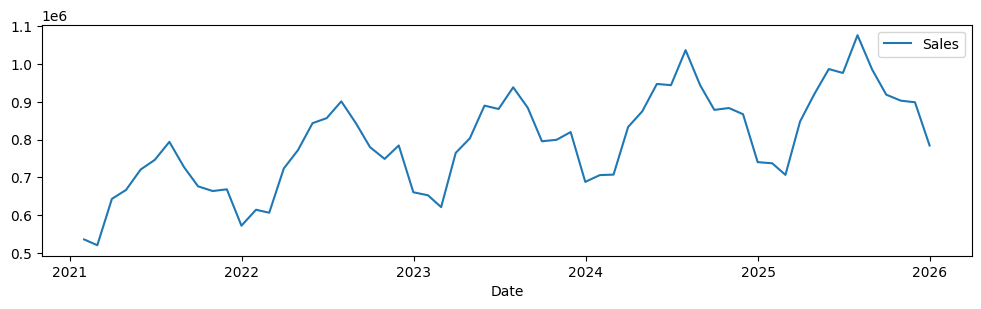

In [182]:
# Sum Sales monthly
data = df.resample('M')['Sales'].sum().to_frame()

# plot the data for better understanding
plt.figure(figsize=(12,3))
sns.lineplot(data=data)

In [183]:
# Create rolling mean and SD
rolmean = data.rolling(window=12).mean()
rolstd = data.rolling(window=12).std()
print(rolmean.head(15))
print(rolstd.head(15))

                    Sales
Date                     
2021-01-31            NaN
2021-02-28            NaN
2021-03-31            NaN
2021-04-30            NaN
2021-05-31            NaN
2021-06-30            NaN
2021-07-31            NaN
2021-08-31            NaN
2021-09-30            NaN
2021-10-31            NaN
2021-11-30            NaN
2021-12-31  661770.250000
2022-01-31  668286.666667
2022-02-28  675417.833333
2022-03-31  682091.666667
                   Sales
Date                    
2021-01-31           NaN
2021-02-28           NaN
2021-03-31           NaN
2021-04-30           NaN
2021-05-31           NaN
2021-06-30           NaN
2021-07-31           NaN
2021-08-31           NaN
2021-09-30           NaN
2021-10-31           NaN
2021-11-30           NaN
2021-12-31  83211.510752
2022-01-31  75220.464295
2022-02-28  63139.938812
2022-03-31  63718.127157


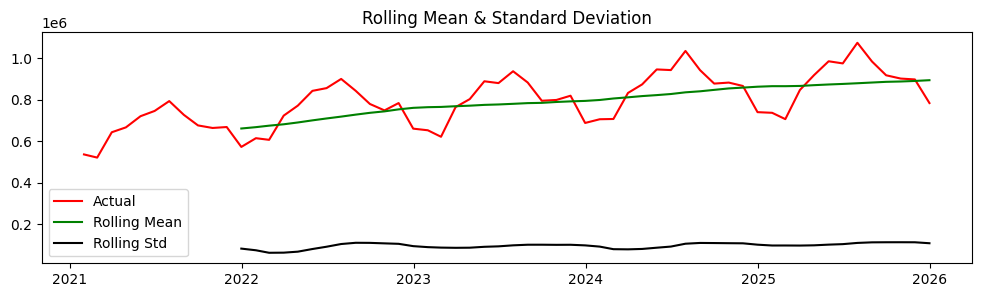

In [184]:
# Show Plot
plt.figure(figsize=(12,3))
actual = plt.plot(data, color='red', label='Actual')
mean_12 = plt.plot(rolmean, color='green', label='Rolling Mean')
std_12 = plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [185]:
# import adfulller test to check wheather data is stationary or not
from statsmodels.tsa.stattools import adfuller

# Define adfuller for reasuse with explanation
def adfuller_test(data):
    result = adfuller(data)
    labels = ['ADF Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used']
    for value, label in zip(result, labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")


In [186]:
# Perform adfuller test
adfuller_test(data)

ADF Test Statistic : -4.570251606630179
p-value : 0.00014649839461233085
#Lags Used : 11
Number of Observations Used : 48
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [187]:
# import kpss  test to check wheather data is stationary or not

from statsmodels.tsa.stattools import kpss

# Define kpss for reasuse with explanation

def kpss_test(timeseries):
    print("Results of KPSS Test:")
    kpsstest = kpss(timeseries, regression="c")
    kpss_output = pd.Series(
        kpsstest[0:3], index=["Test Statistic", "p-value", "Lags Used"]
    )
    for key, value in kpsstest[3].items():
        kpss_output["Critical Value (%s)" % key] = value
    print(kpss_output)

    if (kpss_output['p-value'] < 0.05):
        print("The time series is not stationary")
    else:
        print("The time series is stationary")

In [188]:
# Perform Kpss
kpss_test(data)

Results of KPSS Test:
Test Statistic           0.814082
p-value                  0.010000
Lags Used                4.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64
The time series is not stationary


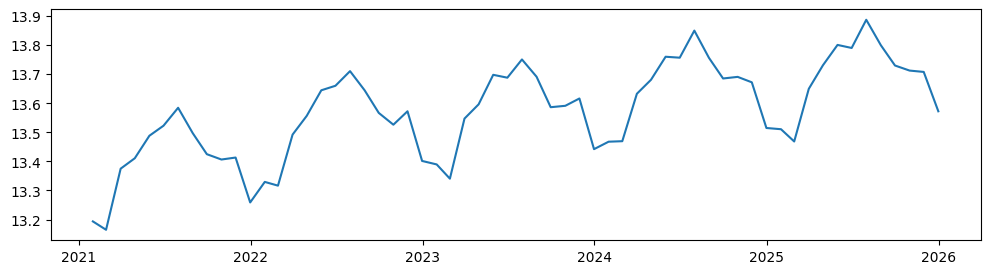

In [189]:
# Show plot and convert the dat logarithm  to mkae SD stationary
plt.figure(figsize=(12,3))
data_log = np.log(data)
plt.plot(data_log)
data_log.dropna(inplace = True)

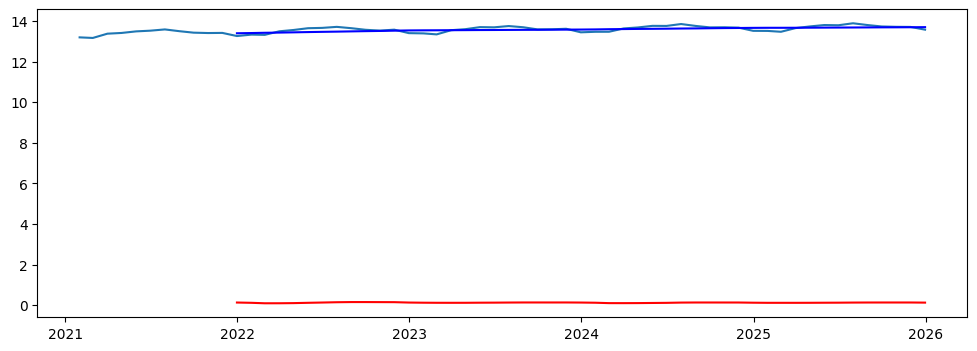

In [190]:
# Show logged data, it seemes it converted to stationary.
plt.figure(figsize=(12,4))
MAvg=data_log.rolling(window=12).mean()
MStd=data_log.rolling(window=12).std()
plt.plot(data_log)
plt.plot(MAvg, color='blue')
plt.plot(MStd, color='red')

In [191]:
# Repalce and drop unusal data
data_log_clean = data_log.replace([np.inf, -np.inf], np.nan).dropna()
data_log = data_log_clean


In [192]:
# Perform adfuller_test  and notice data is stationary
adfuller_test(data_log)

ADF Test Statistic : -5.760073725922694
p-value : 5.699386580617131e-07
#Lags Used : 11
Number of Observations Used : 48
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [193]:
# Perform kpss_test  but  it says data is not stationary

kpss_test(data_log)

Results of KPSS Test:
Test Statistic           0.823544
p-value                  0.010000
Lags Used                4.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64
The time series is not stationary


In [194]:
# Shift data to make its stationary
data_log.shift()
data_shift = data_log-data_log.shift()
data_shift.dropna(inplace=True)

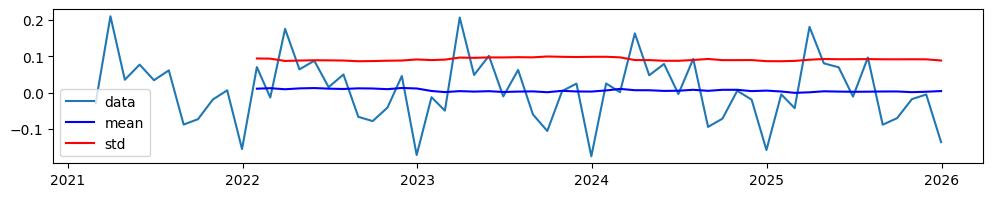

In [195]:
# Plot shifted and logged data
plt.figure(figsize=(12,2))
MAvg=data_shift.rolling(window=12).mean()
MStd=data_shift.rolling(window=12).std()
plt.plot(data_shift, label='data')
plt.plot(MAvg, color='blue', label='mean')
plt.plot(MStd, color='red', label='std')
plt.legend()

In [196]:
# Test Shifted data
adfuller_test(data_shift)
kpss_test(data_shift)

ADF Test Statistic : -2.1236259085771523
p-value : 0.23512122648808598
#Lags Used : 11
Number of Observations Used : 47
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 
Results of KPSS Test:
Test Statistic           0.088834
p-value                  0.100000
Lags Used                3.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64
The time series is stationary


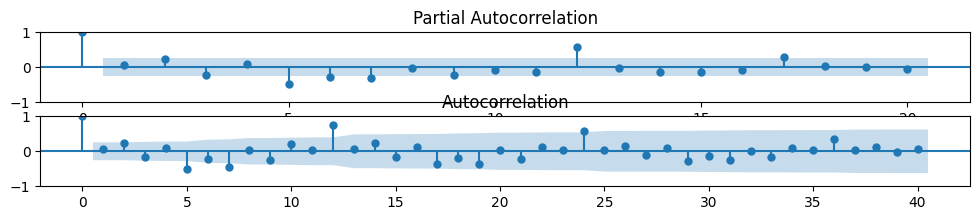

In [197]:
# Plot Partial Autocorr and autocorr to idenotify p,d,q
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig = plt.figure(figsize=(12,2))
top_fig = fig.add_subplot(211)
fig = plot_pacf(data_shift.dropna(), lags=20, ax=top_fig)
bottom_fig = fig.add_subplot(212)
fig = plot_acf(data_shift.dropna(), lags=40, ax=bottom_fig)

In [198]:
# Import ARIMA
from statsmodels.tsa.arima.model import ARIMA

In [199]:
# Fit logged data in ARIMA since this model have deafult shift option called d
model = ARIMA(data_log, order=(5, 1, 7))
model_fit = model.fit()
#Get summary of model
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   60
Model:                 ARIMA(5, 1, 7)   Log Likelihood                  93.283
Date:                Tue, 30 Sep 2025   AIC                           -160.567
Time:                        15:52:08   BIC                           -133.559
Sample:                    01-31-2021   HQIC                          -150.024
                         - 12-31-2025                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7523      0.101      7.431      0.000       0.554       0.951
ar.L2         -0.2365      0.100     -2.367      0.018      -0.432      -0.041
ar.L3         -0.3058      0.102     -2.996      0.003      -0.506      -0.106
ar.L4          0.7273      0.109      6.667      0.000       0.514       0.941
ar.L5         -0.9546      0.087    -11.028      0.000      -1.124      -0.785
ma.L1         -0.6518      9.890     -0.066      0.947     -20.036      18.733
ma.L2         -0.5957      4.865     -0.122      0.903     -10.131       8.940
ma.L3          1.0628      9.174      0.116      0.908     -16.919      19.044
ma.L4         -1.0443      7.539     -0.139      0.890     -15.820      13.731
ma.L5          0.4175      9.299      0.045      0.964     -17.808      18.643
ma.L6          0.9667      5.100      0.190      0.850      -9.028      10.962
ma.L7         -0.6403      6.827     -0.094      0.925     -14.021      12.741
sigma2         0.0017      0.018      0.094      0.925      -0.034       0.038
===================================================================================
Ljung-Box (L1) (Q):                  10.94   Jarque-Bera (JB):                 0.72
Prob(Q):                              0.00   Prob(JB):                         0.70
Heteroskedasticity (H):               0.77   Skew:                             0.23
Prob(H) (two-sided):                  0.56   Kurtosis:                         2.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [200]:

# In-sample forecast (non-dynamic for full line)
data['forecast'] = np.exp(model_fit.predict(start=50, end=len(data_log)-1, dynamic=False))

# Out-of-sample forecast
forecast_steps = 12
forecast = np.exp(model_fit.forecast(steps=forecast_steps))

# Future monthly dates
last_date = data.index[-1]
future_dates = pd.date_range(start=last_date + pd.offsets.MonthBegin(1), periods=forecast_steps, freq='M')
forecast.index = future_dates


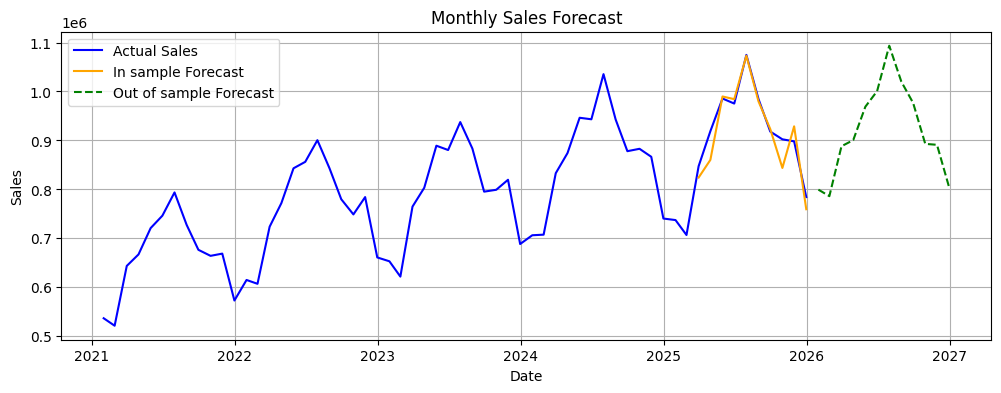

In [201]:
# Plot ARIMA forecast
plt.figure(figsize=(12,4))
plt.plot(data['Sales'], label='Actual Sales', color='blue')
plt.plot(data['forecast'], label='In sample Forecast', color='orange')
plt.plot(forecast, '--', label='Out of sample Forecast', color='green')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Monthly Sales Forecast')
plt.legend()
plt.grid(True)
plt.show()

# seems it is not satisfactory so we would perform SARIMA

In [202]:
# Create a DataFrame for out-of-sample forecast
forecast_df = pd.DataFrame({'Sales': [np.nan]*forecast_steps,'forecast': forecast}, index=future_dates)

# Combine in sample and out of sample forecasts
full_df = pd.concat([data[['Sales', 'forecast']], forecast_df])

# Display table
display(full_df.tail(10))


,Sales,forecast
2026-03-31,NaN,8.881875e+05
2026-04-30,NaN,9.006335e+05
2026-05-31,NaN,9.689187e+05
2026-06-30,NaN,1.000718e+06
2026-07-31,NaN,1.093442e+06
2026-08-31,NaN,1.019895e+06
2026-09-30,NaN,9.766324e+05
2026-10-31,NaN,8.930050e+05
2026-11-30,NaN,8.910676e+05
2026-12-31,NaN,8.043056e+05


In [203]:
#Import SARIMAX
from statsmodels.tsa.statespace.sarimax import SARIMAX


In [204]:
# Define Model and Fit Logged data on SARIMAX model
sarima_model = SARIMAX(data_log, order=(5,1,7), seasonal_order=(1,0,0,12),enforce_stationarity=False, enforce_invertibility=False)
sarima_fit = sarima_model.fit(disp=False)


In [205]:
#Runs prediction using model
pred_in = sarima_fit.get_prediction(start=0, end=len(data_log)-1, dynamic=False)

#Extract predicted mean and variance, remive infiniy and fill with zero
mu_in = pred_in.predicted_mean
sigma2_in = pred_in.var_pred_mean.clip(lower=0).fillna(0)

# Back in normal scale for predicted values.
forecast_in_sample = np.exp(mu_in + 0.5 * sigma2_in)

# Aligning it with the same index as your original data.
forecast_in_sample = pd.Series(forecast_in_sample, index=data.index)

#Replaces any infinite values (inf, -inf) with NaN.
forecast_in_sample = forecast_in_sample.replace([np.inf, -np.inf], np.nan).fillna(method="ffill")


In [206]:
#Set Forecast period in month
n_forecast = 24

#Runs prediction using model
pred_out = sarima_fit.get_forecast(steps=n_forecast)

#Extract predicted mean and variance, remive infiniy and fill with zero
mu_out = pred_out.predicted_mean
sigma2_out = pred_out.var_pred_mean.clip(lower=0).fillna(0)

# Back in normal scale for predicted values.
forecast_out_sample = np.exp(mu_out + 0.5 * sigma2_out)

#Creates a Series with proper future monthly dates as index
forecast_out_sample = pd.Series(forecast_out_sample, index=pd.date_range(start=data.index[-1]+pd.offsets.MonthEnd(1),periods=n_forecast,freq='M'))
forecast_out_sample = forecast_out_sample.replace([np.inf, -np.inf], np.nan).fillna(method="ffill")


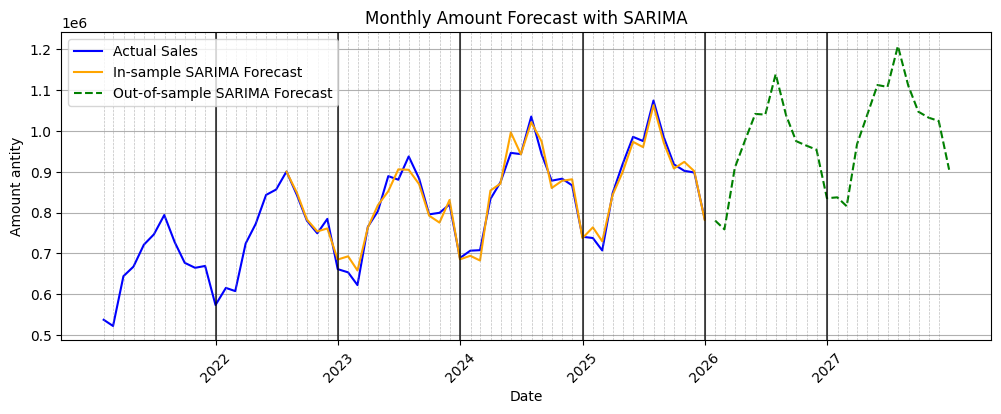

In [207]:
import matplotlib.dates as mdates

plt.figure(figsize=(12,4))

# Plot actual and forecasted values
plt.plot(data.index, data['Sales'], label='Actual Sales', color='blue')
plt.plot(forecast_in_sample.index, forecast_in_sample, label='In-sample SARIMA Forecast', color='orange')
plt.plot(forecast_out_sample.index, forecast_out_sample, '--', label='Out-of-sample SARIMA Forecast', color='green')

# Add vertical lines for months
for date in pd.date_range(start=data.index[0], end=forecast_out_sample.index[-1], freq='MS'):
    if date.month == 1:  # January → new year
        plt.axvline(x=date, color='black', linestyle='-', linewidth=1.2, alpha=0.8)
    else:
        plt.axvline(x=date, color='gray', linestyle='--', linewidth=0.5, alpha=0.5)

# Set x-axis ticks for every year
years = pd.date_range(start=data.index[0], end=forecast_out_sample.index[-1], freq='YS')
plt.xticks(years, [year.year for year in years], rotation=45)

plt.xlabel('Date')
plt.ylabel('Amount antity')
plt.title('Monthly Amount Forecast with SARIMA')
plt.legend()
plt.grid(True)
plt.show()


In [208]:
# Full aligned table
full_table = pd.DataFrame(index=data.index.append(forecast_out_sample.index))
full_table["Actual"] = data['Sales']
full_table["In-sample Forecast"] = forecast_in_sample
full_table["Out-of-sample Forecast"] = forecast_out_sample

# Show last 20 rows (includes future forecasts)
print(full_table.head(10))


              Actual  In-sample Forecast  Out-of-sample Forecast
2021-01-31  536883.0                 NaN                     NaN
2021-02-28  521637.0                 NaN                     NaN
2021-03-31  643749.0                 NaN                     NaN
2021-04-30  667252.0                 NaN                     NaN
2021-05-31  720997.0                 NaN                     NaN
2021-06-30  746372.0                 NaN                     NaN
2021-07-31  793851.0                 NaN                     NaN
2021-08-31  727523.0                 NaN                     NaN
2021-09-30  676658.0                 NaN                     NaN
2021-10-31  664343.0                 NaN                     NaN
